In [1]:
import os 
os.chdir("/workspaces/p99-bluesky/tests/")

import asyncio
import subprocess, os
from bluesky.run_engine import RunEngine
from ophyd_async.core import DeviceCollector
from ophyd_async.epics.signal import epics_signal_r, epics_signal_rw
from ophyd_async.core.signal import observe_value, wait_for_value
from p99_bluesky.devices.p99.sample_stage import (
    FilterMotor,
    SampleAngleStage,
    p99StageSelections,
)
from p99_bluesky.plans.fast_scan import fast_scan_1d, fast_scan_grid
from p99_bluesky.plans.stxm import stxm_fast,get_velocity_and_step_size, stxm_step
from soft_motor import SoftThreeAxisStage
from bluesky.run_engine import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
from ophyd.sim import noisy_det as det
bec = BestEffortCallback()
RE = RunEngine({})
from databroker import Broker
db = Broker.named('temp')
RE.subscribe(db.insert)
from p99_bluesky.sim.sim_stages import SimThreeAxisStage
async with DeviceCollector():
        xyz_motor = SimThreeAxisStage(name="sim_motor", instant=False)


Deferred pause acknowledged. Continuing to checkpoint.
Deferred pause acknowledged. Continuing to checkpoint.


2024-07-18 15:05:27,111 - P99 - INFO - Check sim_motor-x limits.
2024-07-18 15:05:27,112 - P99 - INFO - Check sim_motor-y limits.
2024-07-18 15:05:27,113 - P99 - INFO - Stored motor, position  = [<p99_bluesky.sim.sim_stages.p99SimMotor object at 0x7fea647db9d0>, 0, <p99_bluesky.sim.sim_stages.p99SimMotor object at 0x7feae07321d0>, 0].


Transient Scan ID: 9     Time: 2024-07-18 15:05:27
Persistent Unique Scan ID: '27a24f6d-fb9c-488e-a267-83091f2c9c09'
New stream: 'primary'
+-----------+------------+---------------------------+---------------------------+------------+
|   seq_num |       time | sim_motor-x-user_readback | sim_motor-y-user_readback |  noisy_det |
+-----------+------------+---------------------------+---------------------------+------------+
|         1 | 15:05:27.2 |                     0.000 |                    -1.000 |      0.966 |
|         2 | 15:05:27.3 |                     0.000 |                     0.000 |      1.046 |
|         3 | 15:05:27.5 |                

('27a24f6d-fb9c-488e-a267-83091f2c9c09',)

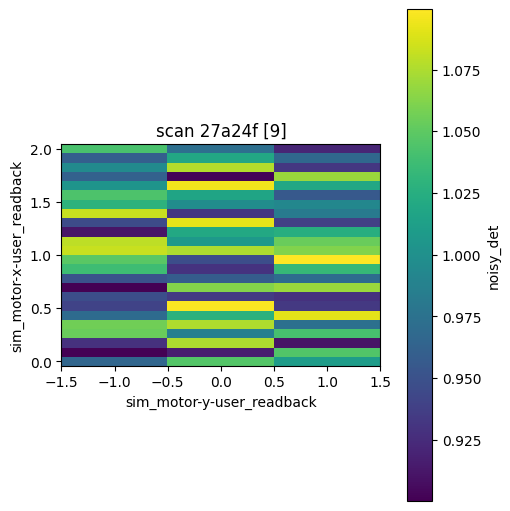

In [18]:
from collections import defaultdict
from bluesky.plan_stubs import mov
docs = defaultdict(list)

def capture_emitted(name, doc):
    docs[name].append(doc)

# Unknown step size
docs = defaultdict(list)
RE(mov(xyz_motor.x, 0, xyz_motor.y,0),bec)
RE(
    stxm_step(
        det=[det],
        count_time=0.2,
        x_step_motor=xyz_motor.x,
        x_step_start=0,
        x_step_end=2,
        x_step_size=0.09,
        y_step_motor=xyz_motor.y,
        y_step_start=-1,
        y_step_end=1,
        y_step_size=1,
        home=True,
        snake=False,
    ),
    bec,
)


In [20]:
result = asyncio.gather(xyz_motor.x.user_readback.get_value(),xyz_motor.y.user_readback.get_value())

In [22]:
result

<_GatheringFuture finished result=[0, 0]>

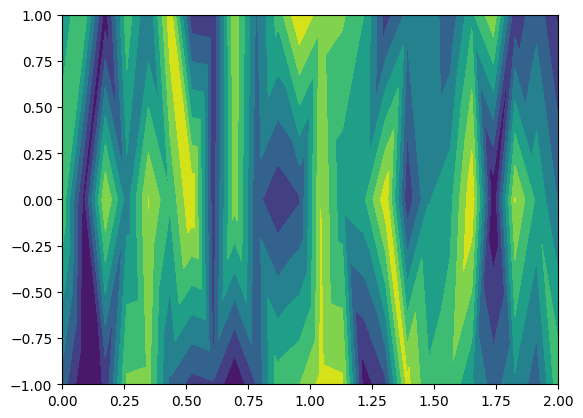

In [21]:
import matplotlib.pyplot as plt
header = db[-1]
data = header.table()
plt.tricontourf(data["sim_motor-x-user_readback"],data["sim_motor-y-user_readback"],data['noisy_det'])

In [17]:
RE.stop()

Stopping: running cleanup and marking exit_status as 'success'...


('a126ccfb-a073-48e9-90f5-98c74a4be330',)